In [18]:
import pandas as pd
import random
from citipy import citipy
import json
import requests as req
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn
import apikeys

api_key = apikeys.OWM_API_KEY

In [3]:
cities = []

for x in range(5):
    lat = random.randint(-90,90)
    lon = random.randint(-180,180)
    cities.append(citipy.nearest_city(lat, lon))

for index, city in enumerate(cities):
    country_code = city.country_code
    name = city.city_name
    print("City " + str(index + 1) + ": '"  + name + "' with country code of '" + country_code + "'.")

City 1: 'hermanus' with country code of 'za'.
City 2: 'mgandu' with country code of 'tz'.
City 3: 'georgetown' with country code of 'sh'.
City 4: 'albany' with country code of 'au'.
City 5: 'fare' with country code of 'pf'.


In [4]:
weather_data = []

url = 'http://api.openweathermap.org/data/2.5/weather'
params = {'appid': apikeys.OWM_API_KEY,
          'q': '',
          'units': 'imperial'}

for city in cities:
    params['q'] = city.city_name + ',' + city.country_code
    response = req.get(url, params=params).json()
    weather_data.append(response)

print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 92
    },
    "cod": 200,
    "coord": {
        "lat": -16.7,
        "lon": -151.02
    },
    "dt": 1511855753,
    "id": 4034496,
    "main": {
        "grnd_level": 1024.87,
        "humidity": 98,
        "pressure": 1024.87,
        "sea_level": 1026.09,
        "temp": 81.25,
        "temp_max": 81.25,
        "temp_min": 81.25
    },
    "name": "Fare",
    "sys": {
        "country": "PF",
        "message": 0.1658,
        "sunrise": 1511882484,
        "sunset": 1511929407
    },
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 82.5002,
        "speed": 12.46
    }
}


In [5]:
city_data = []
cloudiness_data = []
country_data = []
date_data = []
humidity_data = []
lat_data = []
lng_data = []
max_temp_data = []
wind_speed_data = []
for data in weather_data:
    city_data.append(data['name'])
    cloudiness_data.append(data['clouds']['all'])
    country_data.append(data['sys']['country'])
    date_data.append(data['dt'])
    humidity_data.append(data['main']['humidity'])
    lat_data.append(data['coord']['lat'])
    lng_data.append(data['coord']['lon'])
    max_temp_data.append(data['main']['temp_max'])
    wind_speed_data.append(data['wind']['speed'])

weather_dict = {"City": city_data,
                "Cloudiness": cloudiness_data,
                "Country": country_data,
                "Date": date_data,
                "Humidity": humidity_data,
                "Lat": lat_data,
                "Lng": lng_data,
                "Max Temp": max_temp_data,
                "Wind Speed": wind_speed_data}
weather_data_df = pd.DataFrame(weather_dict)
print(weather_data_df.head())

         City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0    Hermanus          12      ZA  1511855751        53 -34.42   19.23   
1      Mgandu          12      TZ  1511855751        91  -5.95   34.13   
2  Georgetown          92      SH  1511855752       100  -7.93  -14.42   
3      Albany           0      AU  1511855752        61 -35.02  117.89   
4        Fare          92      PF  1511855753        98 -16.70 -151.02   

   Max Temp  Wind Speed  
0     72.25        6.64  
1     74.90        9.55  
2     74.36       14.14  
3     67.34       14.47  
4     81.25       12.46  


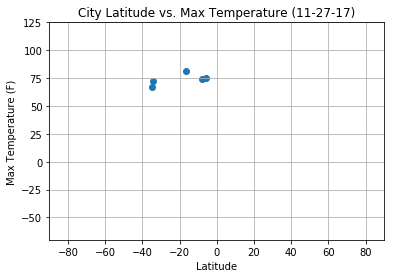

In [21]:
report_date = datetime.fromtimestamp(weather_data_df["Date"].min()).strftime('%m-%d-%y')

plt.scatter(weather_data_df["Lat"], weather_data_df["Max Temp"], marker="o")

title = ("City Latitude vs. Max Temperature (" + str(report_date) + ")")
plt.title(title)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.ylim(-70,125)
plt.grid(True)

plt.savefig("CityLatitudeVsMaxTemperature.png")

plt.show()

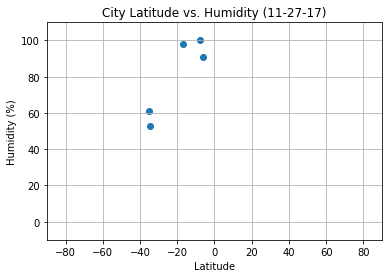

In [22]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Humidity"], marker="o")

title = ("City Latitude vs. Humidity (" + str(report_date) + ")")
plt.title(title)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.ylim(-10,110)
plt.grid(True)

plt.savefig("CityLatitudeVsHumidity.png")

plt.show()

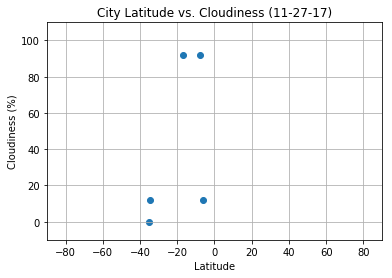

In [23]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness"], marker="o")

title = ("City Latitude vs. Cloudiness (" + str(report_date) + ")")
plt.title(title)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.ylim(-10,110)
plt.grid(True)

plt.savefig("CityLatitudeVsCloudiness.png")

plt.show()

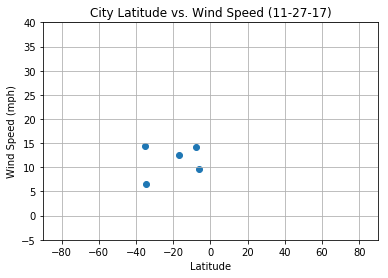

In [24]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed"], marker="o")

title = ("City Latitude vs. Wind Speed (" + str(report_date) + ")")
plt.title(title)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.ylim(-5,40)
plt.grid(True)

plt.savefig("CityLatitudeVsWindSpeed.png")

plt.show()